In [1]:
import os, sys

import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# set data path
dir_path = pathlib.Path().absolute()
file = '../data/MOM4_data.csv'
data_path = os.path.join(dir_path, file)
print('MOM4 data is located at:',data_path)

MOM4 data is located at: /home/jongoh/Documents/kohyoung_codes/angle_analysis/../data/MOM4_data.csv


In [2]:
''' Read dataset '''
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# read data
df = pd.read_csv(data_path  ,index_col=False).drop(['Unnamed: 0'], axis=1)
df.reset_index(drop=True, inplace=True)
assert df.isnull().sum().sum() == 0
df.head()

,CRD,PartType,Orient.,X,Y,SPI_VOLUME1,SPI_VOLUME2,SPI_X1,SPI_Y1,SPI_X2,SPI_Y2,SPI_L1,SPI_W1,SPI_L2,SPI_W2,SPI_L,SPI_W,PRE_X,PRE_Y,PRE_A,PRE_L,PRE_W,POST_X,POST_Y,POST_A,POST_L,POST_W,Job,Chip_L,Chip_W,SPI_R,PRE_R,POST_R,SPI_VOLUME_MEAN,SPI_VOLUME_DIFF
0,B1,R0402,90,31.26,100.11,81.7355,75.6950,-51.9,63.3,-52.1,60.5,63.3,51.9,60.5,52.1,61.90,52.0,-19.887293,-1.840963,-1.877,-1.840963,19.887293,-7.440417,28.108231,1.613,28.108231,7.440417,CENTER,400.0,200.0,80.843120,19.972320,29.076321,78.71525,6.0405
1,B2,R0402,90,31.83,100.11,83.1555,71.5083,-45.7,66.1,-48.3,61.3,66.1,45.7,61.3,48.3,63.70,47.0,-26.766272,6.898049,-1.449,6.898049,26.766272,5.487133,22.242701,0.000,22.242701,-5.487133,CENTER,400.0,200.0,79.162428,27.640847,22.909526,77.33190,11.6472
2,B3,R0402,90,32.40,100.11,87.0870,67.2606,-48.6,75.8,-34.6,68.9,75.8,48.6,68.9,34.6,72.35,41.6,-32.058273,8.125244,-3.278,8.125244,32.058273,-19.644203,12.971593,1.552,12.971593,19.644203,CENTER,400.0,200.0,83.457070,33.071929,23.540538,77.17380,19.8264
3,B4,R0402,90,32.97,100.11,80.0433,75.8866,-56.3,65.8,-44.9,60.4,65.8,56.3,60.4,44.9,63.10,50.6,-23.437572,-6.195457,-3.337,-6.195457,23.437572,-22.517658,26.396389,0.000,26.396389,22.517658,CENTER,400.0,200.0,80.882446,24.242596,34.696027,77.96495,4.1567
4,B5,R0402,90,33.54,100.11,76.7088,74.0452,-48.9,69.7,-51.1,69.2,69.7,48.9,69.2,51.1,69.45,50.0,-5.187286,7.085744,-3.408,7.085744,5.187286,-21.413681,29.193306,3.611,29.193306,21.413681,CENTER,400.0,200.0,85.576296,8.781555,36.204901,75.37700,2.6636


[Total] Chip: R0402
	Pad (distance/angle): 60750
	SPI (distance/angle): 60750
[Max dists] Chip: R0402
	Pad: [0.0, 13449.0, 26898.0, 40348.0, 53797.0, 67247.0, 80696.0, 94145.0, 107595.0, 121044.0, 134494.0, 147943.0, 161393.0, 174842.0, 188291.0] 
	SPI: [0.0, 18.0, 36.0, 54.0, 72.0, 90.0, 109.0, 127.0, 145.0, 163.0, 181.0, 200.0, 218.0, 236.0, 254.0]
[INFO] at i: 1 	PAD ( 0.0 : 13449.0 ): None
[INFO] at i: 2 	PAD ( 13449.0 : 26898.0 ): None
[INFO] at i: 5 	PAD ( 53797.0 : 67247.0 ): None
[INFO] at i: 6 	PAD ( 67247.0 : 80696.0 ): None
[INFO] at i: 7 	PAD ( 80696.0 : 94145.0 ): None
[INFO] at i: 8 	PAD ( 94145.0 : 107595.0 ): None
[INFO] at i: 9 	PAD ( 107595.0 : 121044.0 ): None
[INFO] at i: 10 	PAD ( 121044.0 : 134494.0 ): None
[INFO] at i: 11 	PAD ( 134494.0 : 147943.0 ): None
[INFO] at i: 12 	PAD ( 147943.0 : 161393.0 ): None
[INFO] at i: 13 	PAD ( 161393.0 : 174842.0 ): None
[INFO] at i: 14 	PAD ( 174842.0 : 188291.0 ): None


/home/jongoh/anaconda3/envs/torch/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3418: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/jongoh/anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:212: MatplotlibDeprecationWarning: Since 3.2, the parameter *where* must have the same size as [8942.233461684811 11230.95635962667] in fill_betweenx(). This will become an error two minor releases later.
/home/jongoh/anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:230: MatplotlibDeprecationWarning: Since 3.2, the parameter *where* must have the same size as [2.2798773398921934 6.7502211929753555 11.250038427400717
 15.749846045259396 20.249766931520604 24.874194765226925
 29.50020982099895 34.00034853824238 38.49805157334161 43.004729083457654
 47.63452489227498 52.27463965298833 57.00644965071899 61.01719610762788] in fill_betweenx(). This will become an error two minor releases lat

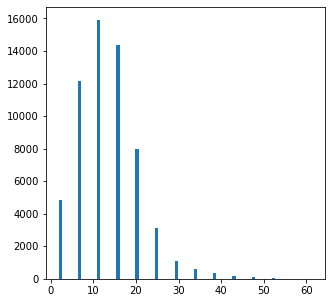

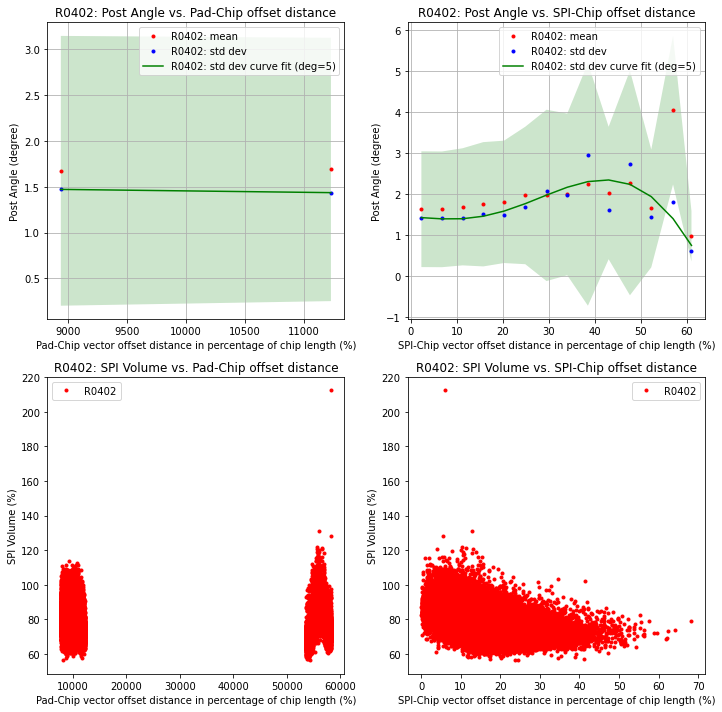

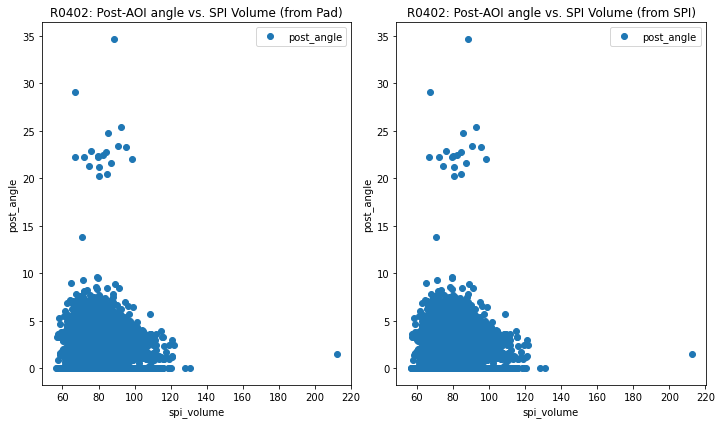

[Total] Chip: R0603
	Pad (distance/angle): 60749
	SPI (distance/angle): 60749
[Max dists] Chip: R0603
	Pad: [0.0, 12513.0, 25026.0, 37539.0, 50052.0, 62566.0, 75079.0, 87592.0, 100105.0, 112619.0, 125132.0, 137645.0, 150158.0, 162671.0, 175185.0] 
	SPI: [0.0, 24.0, 48.0, 72.0, 97.0, 121.0, 145.0, 169.0, 194.0, 218.0, 242.0, 266.0, 291.0, 315.0, 339.0]
[INFO] at i: 1 	PAD ( 0.0 : 12513.0 ): None
[INFO] at i: 2 	PAD ( 12513.0 : 25026.0 ): None
[INFO] at i: 3 	PAD ( 25026.0 : 37539.0 ): None
[INFO] at i: 4 	PAD ( 37539.0 : 50052.0 ): None
[INFO] at i: 5 	PAD ( 50052.0 : 62566.0 ): None
[INFO] at i: 10 	PAD ( 112619.0 : 125132.0 ): None
[INFO] at i: 11 	PAD ( 125132.0 : 137645.0 ): None
[INFO] at i: 12 	PAD ( 137645.0 : 150158.0 ): None
[INFO] at i: 13 	PAD ( 150158.0 : 162671.0 ): None
[INFO] at i: 14 	PAD ( 162671.0 : 175185.0 ): None


/home/jongoh/anaconda3/envs/torch/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3418: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/jongoh/anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:212: MatplotlibDeprecationWarning: Since 3.2, the parameter *where* must have the same size as [12323.433538876794 13556.320702830777 15641.054767528662
 17235.191620318164] in fill_betweenx(). This will become an error two minor releases later.
/home/jongoh/anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:230: MatplotlibDeprecationWarning: Since 3.2, the parameter *where* must have the same size as [2.001130266533048 6.000403324942153 9.999984743162143 14.083298559718793
 18.166734946085235 22.1665659641278 26.165261726114426 30.24945242561295
 34.33114797527226 38.333434733493796 42.308353617231994 46.40100701943021
 50.246594173015055 54.40345404635502] in fill_betweenx(). This will

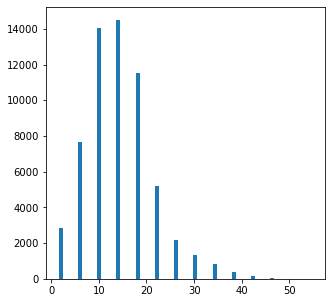

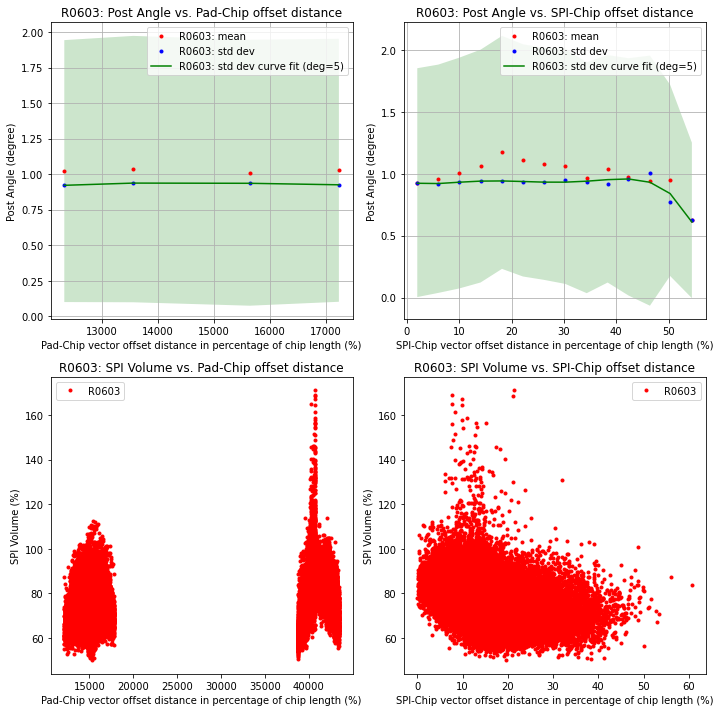

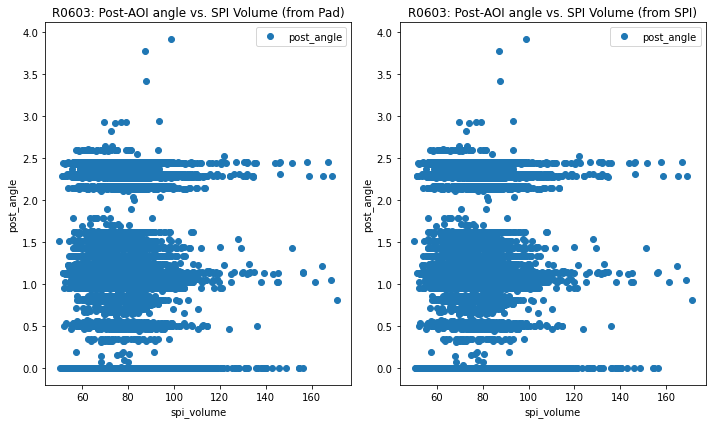

[Total] Chip: R1005
	Pad (distance/angle): 60748
	SPI (distance/angle): 60748
[Max dists] Chip: R1005
	Pad: [0.0, 10588.0, 21177.0, 31766.0, 42355.0, 52944.0, 63533.0, 74122.0, 84710.0, 95299.0, 105888.0, 116477.0, 127066.0, 137655.0, 148244.0] 
	SPI: [0.0, 31.0, 62.0, 93.0, 124.0, 155.0, 186.0, 218.0, 249.0, 280.0, 311.0, 342.0, 373.0, 404.0, 436.0]
[INFO] at i: 1 	PAD ( 0.0 : 10588.0 ): None
[INFO] at i: 2 	PAD ( 10588.0 : 21177.0 ): None
[INFO] at i: 3 	PAD ( 21177.0 : 31766.0 ): None
[INFO] at i: 4 	PAD ( 31766.0 : 42355.0 ): None
[INFO] at i: 5 	PAD ( 42355.0 : 52944.0 ): None
[INFO] at i: 6 	PAD ( 52944.0 : 63533.0 ): None
[INFO] at i: 7 	PAD ( 63533.0 : 74122.0 ): None
[INFO] at i: 8 	PAD ( 74122.0 : 84710.0 ): None
[INFO] at i: 9 	PAD ( 84710.0 : 95299.0 ): None
[INFO] at i: 10 	PAD ( 95299.0 : 105888.0 ): None
[INFO] at i: 11 	PAD ( 105888.0 : 116477.0 ): None
[INFO] at i: 12 	PAD ( 116477.0 : 127066.0 ): None
[INFO] at i: 13 	PAD ( 127066.0 : 137655.0 ): None
[INFO] at i: 14 

TypeError: expected non-empty vector for x

In [21]:
# Observe Pre/Post-AOI angle vs. offset distance between Pre/Post and SPI & Pad positions
colors = pl.cm.jet(np.linspace(0,1,3))

# switch 90 data to 0 data
def switchOrient(x90, y90):
    y0 = float(x90)
    x0 = float(-y90)
    return x0, y0 

# config
abs_post_angle = True                                               # post_angle in absolute scale
dist_in_chip_length_percentage = True                              # distance in proportion to chip length
pre_or_post = 'pre'                                                 # pre or post angle

dfgroups = df.groupby(['PartType'])                                 # group by chip type
dists = {}
sample_size_by_dist_pad = {}
sample_size_by_dist_spi = {}
for idx, (name, group) in enumerate(dfgroups):                      # iterate through each grouped data
    dists[f'{name}'] = []
    sample_size_by_dist_pad[f'{name}'] = []
    sample_size_by_dist_spi[f'{name}'] = []
    
    
    group = group.drop(columns=['CRD','PartType','Job'],axis=1).astype(float)
    pad1_x, pad1_y, pad2_x, pad2_y = 0, 0, 0, 0
    pad_minus_chip_dist = []
    spi_minus_chip_dist = []
    
    post_a = group['PRE_A'] if pre_or_post == 'pre' else group['POST_A']
    chip_length = group['Chip_L'].values[0]
    
    if abs_post_angle == True:
        post_a = np.abs(post_a)
    
    spi_v = []
    for index, row in group.iterrows():                             # iterate through each row in each data group
        spi_x1, spi_y1, spi_x2, spi_y2, x, y, chip_l, chip_w, orient, spi_v1, spi_v2 = \
            row[['SPI_X1', 'SPI_Y1', 'SPI_X2', 'SPI_Y2', 'X', 'Y', 'Chip_L','Chip_W', 'Orient.','SPI_VOLUME1','SPI_VOLUME2']].astype(float)
        x, y = float(x), float(y)        
        
        post_x, post_y = row[['POST_X','POST_Y']]
        # average spi volume between 1 and 2
        spi_v.append((spi_v1 + spi_v2) / 2)
        
        # switch 90 degree x, y to 0 degree x, y space
        if orient == 90:
            x, y = switchOrient(x,y)
            spi_x1, spi_y1 = switchOrient(spi_x1, spi_y1)
            spi_x2, spi_y2 = switchOrient(spi_x2, spi_y2)
            post_x, post_y = switchOrient(post_x, post_y)
        # compute pad locations (pad is separated apart by (chip_length/2) in both 0 and 90 degree cases)
        pad1_x = (x - (chip_l // 2)/1000)*1000
        pad1_y = (y)*1000
        pad2_x = (x + (chip_l // 2)/1000)*1000
        pad2_y = (y)*1000
        # compute mean pad (for distance simplicity)
        pad_x = (pad1_x + pad2_x) / 2
        pad_y = (pad1_y + pad2_y) / 2
        # compute distance 
        x = np.abs(pad_x - post_x)
        y = np.abs(pad_y - post_y)
        dist = np.linalg.norm((x,y))
        pad_minus_chip_dist.append(dist)

        # compute mean SPI (for distance simplicity)
        spi_x = (spi_x1 + spi_x2) / 2
        spi_y = (spi_y1 + spi_y2) / 2
        # compute distance
        x = np.abs(spi_x - post_x)
        y = np.abs(spi_y - post_y)        
        dist = np.linalg.norm((x, y))
        spi_minus_chip_dist.append(dist)
        
    
    # sort (distance, post_angle, spi_volume) by (distance) and stack all columns for each group
    pad_data = np.column_stack((pad_minus_chip_dist, post_a, spi_v))
    pad_data = pad_data[pad_data[:,0].argsort()] # sort by distance
    pad_data = pd.DataFrame(pad_data, columns=[f'pad_dist_{name}','post_angle','spi_volume'])
    
    spi_data = np.column_stack((spi_minus_chip_dist, post_a, spi_v))
    spi_data = spi_data[spi_data[:,0].argsort()] # sort by distance
    spi_data = pd.DataFrame(spi_data, columns=[f'spi_dist_{name}','post_angle','spi_volume'])
    
    
    num_groups = 15
    pad_range = pad_data.iloc[:,0].max() - pad_data.iloc[:,0].min()
    pad_max_dists = [i * pad_range // num_groups for i in np.arange(num_groups)]
    
    spi_range = spi_data.iloc[:,0].max() - spi_data.iloc[:,0].min()
    spi_max_dists = [i * spi_range // num_groups for i in np.arange(num_groups)]
    
    print(f'[Total] Chip: {name}\n\tPad (distance/angle): {len(pad_data)}\n\tSPI (distance/angle): {len(spi_data)}')
    print(f'[Max dists] Chip: {name}\n\tPad:', pad_max_dists, '\n\tSPI:', spi_max_dists)
    
    # distance - angle dicts
    pad_plot_data = pd.DataFrame(columns=['avg_dist', 'pad_mean', 'pad_std'])
    spi_plot_data = pd.DataFrame(columns=['avg_dist', 'spi_mean', 'spi_std'])
    for i, (pad_max, spi_max) in enumerate(zip(pad_max_dists[0:], spi_max_dists[0:])):
        curr_i, next_i = i, i+1
        if next_i == num_groups:
            next_i = num_groups-1
        # pull indices for which distance is within the defined distance range
        # columns: [distance, post angle, spi volume]
        curr_pad_distances = pad_data.iloc[:,0] 
        pad_valid_df = curr_pad_distances[(curr_pad_distances <= pad_max_dists[next_i]) & (curr_pad_distances > pad_max_dists[curr_i])]
        pad_valid_idx = pad_valid_df.index
        pad_group_df = pad_data.iloc[pad_valid_idx, :]

        curr_spi_distances = spi_data.iloc[:,0]
        spi_valid_df = curr_spi_distances[(curr_spi_distances < spi_max_dists[next_i]) & (curr_spi_distances > spi_max_dists[curr_i])]
        spi_valid_idx = spi_valid_df.index
        spi_group_df = spi_data.iloc[spi_valid_idx, :]
        
        if pad_group_df.empty == True:
            pad_group_df = pd.DataFrame().reindex_like(spi_group_df)
            for col in pad_group_df.columns:
                pad_group_df[col].values[:] = 0
#         print(pad_group_df)
#         print(spi_group_df)
        
#         if pad_group_df.sum().sum() == 0:
#             continue
#         pad_group_df.describe().to_csv(f'{name}_PADdist_{pad_max_dists[curr_i]}_to_{pad_max_dists[next_i]}_group_{i}.csv')
#         spi_group_df.describe().to_csv(f'{name}_SPIdist_{spi_max_dists[curr_i]}_to_{spi_max_dists[next_i]}_group_{i}.csv')
        
        if len(pad_valid_idx) > 0:
            sample_size_by_dist_pad[f'{name}'].append(len(pad_group_df))
        if len(spi_valid_idx) > 0:
            sample_size_by_dist_spi[f'{name}'].append(len(spi_group_df))
            
        # print('sample size in distance: [', pad_max_dists[curr_i], ':', pad_max_dists[next_i], ']:\tPAD:', len(pad_group_df), '\tSPI:', len(spi_group_df))

        if len(pad_valid_idx) == 0 and curr_i != next_i:
            print('[INFO] at i:',i+1, '\tPAD (',pad_max_dists[curr_i],':',pad_max_dists[next_i],'):', 'None')
        else:
            # compute statistics for the angle
            pad_mean = np.mean(pad_group_df.iloc[:, 1])
            pad_std = np.std(pad_group_df.iloc[:, 1])
            # select at which distance to plot this mean and std
            pad_dist_avg = np.mean([pad_group_df.iloc[:,0].max(), pad_group_df.iloc[:,0].min()])        
            
            if dist_in_chip_length_percentage:
                pad_dist_avg = pad_dist_avg / chip_length * 100
                
            if not np.isnan(pad_dist_avg):
                pad_plot_data.loc[len(pad_plot_data)] = [pad_dist_avg, pad_mean, pad_std]
                # if pad_std < pad_plot_data.iloc[len(spi_plot_data)-1,2]:            
                    # print('[CHECK] PAD STD is lower than previous STD...', pad_std, ' < ', pad_plot_data.iloc[len(pad_plot_data)-1,2])
                    # print(pad_group_df)
        if len(spi_valid_idx) == 0 and curr_i != next_i:
            print('[INFO] at i:',i+1, '\tSPI (',spi_max_dists[curr_i],':',spi_max_dists[next_i],'):', 'None')
        else:
            # compute statistics for the angle
            spi_mean = np.mean(spi_group_df.iloc[:, 1])
            spi_std = np.std(spi_group_df.iloc[:, 1])            
            # select at which distance to plot this mean and std
            spi_dist_avg = np.mean([spi_group_df.iloc[:,0].max(), spi_group_df.iloc[:,0].min()])
            
            if dist_in_chip_length_percentage:
                spi_dist_avg = spi_dist_avg / chip_length * 100
                                
            if not np.isnan(spi_dist_avg):
                spi_plot_data.loc[len(spi_plot_data)] = [spi_dist_avg, spi_mean, spi_std]
                # if spi_std < spi_plot_data.iloc[len(spi_plot_data)-1,2]:
                    # print('[CHECK] SPI STD is lower than previous STD...', spi_std, ' < ', spi_plot_data.iloc[len(spi_plot_data)-1,2])
                    # print(spi_group_df)
                    
    
#     pad_plot_data.to_csv(f'{name}_PADdist_angle.csv', index=False)
#     spi_plot_data.to_csv(f'{name}_SPIdist_angle.csv', index=False)

    
    # polynomial curve fitting
    degree = 5
    coeff = np.polyfit(pad_plot_data.iloc[:,0].values, pad_plot_data.iloc[:,2].values, degree)
    poly = np.poly1d(coeff)
    poly_y_pad = poly(pad_plot_data.iloc[:,0])

    coeff = np.polyfit(spi_plot_data.iloc[:,0].values, spi_plot_data.iloc[:,2].values, degree)
    poly = np.poly1d(coeff)
    poly_y_spi = poly(spi_plot_data.iloc[:,0])

    ''' plot mean and std  '''
    # plot bar chart of sample sizes by distances
    fig3 = plt.figure(figsize=(5,5))
    plt.bar(list(pad_plot_data['avg_dist'].values), sample_size_by_dist_pad[f'{name}'])
#     plt.savefig(f'./histogram_pad_{name}.png')
    fig3.clf()
    plt.bar(list(spi_plot_data['avg_dist'].values), sample_size_by_dist_spi[f'{name}'])
#     plt.savefig(f'./histogram_spi_{name}.png')
    
    
    # x: spi-chip or pad-chip distance (um), y: post angle stats (degree)
    fig = plt.figure(figsize=(10,10))
    
    ax = fig.add_subplot(221)
    ax.plot(pad_plot_data.iloc[:,0], pad_plot_data.iloc[:,1], 'r.', label=f'{name}: mean')
    ax.plot(pad_plot_data.iloc[:,0], pad_plot_data.iloc[:,2], 'b.', label=f'{name}: std dev')
    ax.plot(pad_plot_data.iloc[:,0], poly_y_pad, marker='', color='green', label=f'{name}: std dev curve fit (deg={degree})')
    lower = [(m-s) for m,s in zip(pad_plot_data.iloc[:,1],pad_plot_data.iloc[:,2])]
    upper = [(m+s) for m,s in zip(pad_plot_data.iloc[:,1],pad_plot_data.iloc[:,2])]
    ax.fill_between(pad_plot_data.iloc[:,0], lower, upper, where=upper>lower, facecolor='green', alpha=0.2)
    ax.set_title(f'{name}: Post Angle vs. Pad-Chip offset distance')
    if dist_in_chip_length_percentage:
        ax.set_xlabel('Pad-Chip vector offset distance in percentage of chip length (%)')
    else:
        ax.set_xlabel('Pad-Chip vector offset distance (\u03BCm)')
    ax.set_ylabel('Post Angle (degree)')
#     ax.set_xlim([np.min(pad_plot_data.iloc[:,0]), np.max(pad_plot_data.iloc[:,0])])
    # ax.set_ylim([-2, 6])
    ax.legend()
    ax.grid()
    
    ax2 = fig.add_subplot(222)
    ax2.plot(spi_plot_data.iloc[:,0], spi_plot_data.iloc[:,1], 'r.', label=f'{name}: mean')
    ax2.plot(spi_plot_data.iloc[:,0],spi_plot_data.iloc[:,2], 'b.', label=f'{name}: std dev')
    ax2.plot(spi_plot_data.iloc[:,0], poly_y_spi, marker='', color='green', label=f'{name}: std dev curve fit (deg={degree})')
    lower = [(m-s) for m,s in zip(spi_plot_data.iloc[:,1],spi_plot_data.iloc[:,2])]
    upper = [(m+s) for m,s in zip(spi_plot_data.iloc[:,1],spi_plot_data.iloc[:,2])]
    ax2.fill_between(spi_plot_data.iloc[:,0], lower, upper, where=upper>lower, facecolor='green', alpha=0.2)
    ax2.set_title(f'{name}: Post Angle vs. SPI-Chip offset distance')
    if dist_in_chip_length_percentage:
        ax2.set_xlabel('SPI-Chip vector offset distance in percentage of chip length (%)')
    else:
        ax2.set_xlabel('SPI-Chip vector offset distance (\u03BCm)')
    ax2.set_ylabel('Post Angle (degree)')
#     ax2.set_xlim([np.min(spi_plot_data.iloc[:,0]), np.max(spi_plot_data.iloc[:,0])])
    # ax2.set_ylim([-2, 6])
    ax2.legend()
    ax2.grid()
    
    ax3 = fig.add_subplot(223)
    ax3.plot(pad_minus_chip_dist/chip_length*100, spi_v, 'r.', label=f'{name}')
    ax3.set_title(f'{name}: SPI Volume vs. Pad-Chip offset distance')
    if dist_in_chip_length_percentage:
        ax3.set_xlabel('Pad-Chip vector offset distance in percentage of chip length (%)')
    else:
        ax3.set_xlabel('Pad-Chip vector offset distance (\u03BCm)')
    ax3.set_ylabel('SPI Volume (%)')
    # ax3.set_xlim([np.min(pad_plot_data.iloc[:,0]), np.max(pad_plot_data.iloc[:,0])])
    # ax3.set_xlim([25, 35])
#     ax3.set_ylim([np.min(spi_v), np.max(spi_v)])
    ax3.legend()   
    
    ax4 = fig.add_subplot(224)
    ax4.plot(spi_minus_chip_dist/chip_length*100, spi_v, 'r.', label=f'{name}')
    ax4.set_title(f'{name}: SPI Volume vs. SPI-Chip offset distance')
    if dist_in_chip_length_percentage:
        ax4.set_xlabel('SPI-Chip vector offset distance in percentage of chip length (%)')
    else:
        ax4.set_xlabel('SPI-Chip vector offset distance (\u03BCm)')
    ax4.set_ylabel('SPI Volume (%)')
#     ax4.set_xlim([np.min(spi_plot_data.iloc[:,0]), np.max(spi_plot_data.iloc[:,0])])
    # ax4.set_xlim([25, 35])
#     ax4.set_ylim([np.min(spi_v), np.max(spi_v)])
    ax4.legend()  
    
    fig.tight_layout()
    
    # plot angle vs. spi volume during a given offset distance
    pad_data = pd.DataFrame(data=pad_data, columns=[f'pad_dist_{name}', 'post_angle', 'spi_volume'])
    spi_data = pd.DataFrame(data=spi_data, columns=[f'spi_dist_{name}', 'post_angle', 'spi_volume'])

    fig2 = plt.figure(figsize=(10,6))
    ax1 = fig2.add_subplot(121)
    xdata = 'spi_volume'
    ydata = 'post_angle'
    pad_data.plot(ax = ax1, y=ydata, x=xdata, style='o')
    ax2 = fig2.add_subplot(122)
    spi_data.plot(ax = ax2, y=ydata, x=xdata, style='o')

    ax1.set_title(f'{name}: Post-AOI angle vs. SPI Volume (from Pad)')
    ax1.set_xlabel(f'{xdata}')
    ax1.set_ylabel(f'{ydata}')
    ax1.legend()        

    ax2.set_title(f'{name}: Post-AOI angle vs. SPI Volume (from SPI)')
    ax2.set_xlabel(f'{xdata}')
    ax2.set_ylabel(f'{ydata}')
    ax2.legend()        

    fig2.tight_layout()
    
    pre_or_post
    result_dir = f'{pre_or_post}_angle_vs_postdist'
    if not os.path.isdir(result_dir):
        os.makedirs(result_dir)
    if abs_post_angle == True:  
        fig.savefig(f'./{result_dir}/{name}_abs.png')
    else:
        fig.savefig(f'./{result_dir}/{name}.png')
        
    result_dir = f'{pre_or_post}_angle_vs_spivolume'
    if not os.path.isdir(result_dir):
        os.makedirs(result_dir)
    fig2.savefig(f'./{result_dir}/{name}.png')
    
    plt.show()
plt.close()
    